<a href="https://colab.research.google.com/github/AamirSoneji/Test-git/blob/main/3_ml_progs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.cluster import KMeans
from scipy import stats

In [4]:
df= pd.read_csv("/content/drive/MyDrive/ColourXY.csv")
df

,x,y,color
0,144.475109,101.450265,0
1,370.683312,298.003415,2
2,253.714046,234.079402,1
3,148.699165,78.654006,0
4,192.157973,252.837304,1
...,...,...,...
12524,141.967251,238.963257,1
12525,161.932857,67.972458,0
12526,122.451461,94.133502,0
12527,182.881854,114.104916,0


In [6]:
newX=df['x']
newY=df['y']

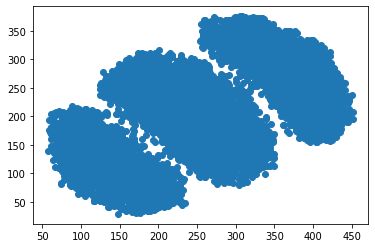

In [10]:
lin= LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(newX, newY, test_size=300, random_state=3)
plt.scatter(xtrain,ytrain)


In [12]:
from scipy import stats
slope,intercept, r, p, std_error = stats.linregress(xtrain,ytrain)
print(slope)
print(intercept)
print(r)

0.4505600949628786
87.25769726375216
0.533616485249158


In [13]:
def myfunc(x):
  return slope*x+intercept

In [14]:
pred=[]

for i in xtrain:
  pred.append(myfunc(i))

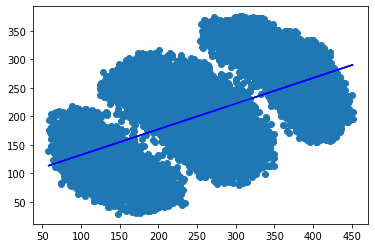

In [15]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,pred,c="blue")

In [4]:
df1=pd.read_csv("/content/drive/MyDrive/Country-data.csv")
df1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
features=['exports','health','income']
Xs=df1[features]
Y=df1['life_expec']

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
model= LinearRegression()
model.fit(Xs,Y)

LinearRegression()

In [7]:
print(model.coef_)
print(model.intercept_)

[1.12701003e-02 4.53416639e-01 2.65651578e-04]
62.44752611732317


In [8]:
def myfunc1(slope,intercept,x):
  return slope*x+intercept

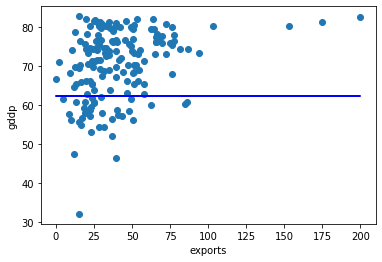

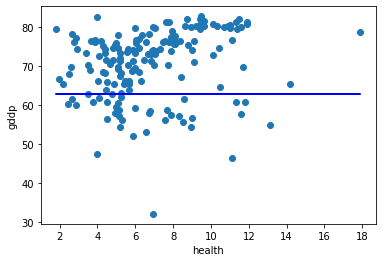

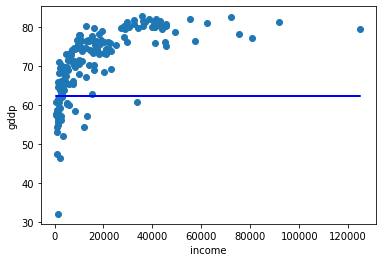

In [9]:
for j in range(3):
  predd=[]
  for i in Xs.iloc[:,j]:
    predd.append(myfunc1(model.coef_[j],model.intercept_,j))

  plt.xlabel(features[j])
  plt.ylabel("gddp")
  plt.scatter(Xs.iloc[:,j],Y)
  plt.plot(Xs.iloc[:,j],predd,c="blue")
  plt.show()

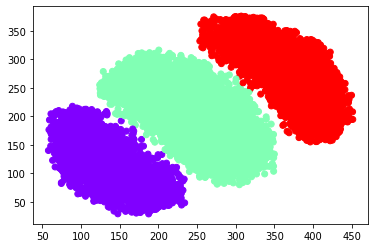

In [43]:
plt.scatter(df['x'], df['y'],c = df['color'], cmap ='rainbow')
features=df[['x','y']]

In [44]:
features

,x,y
0,144.475109,101.450265
1,370.683312,298.003415
2,253.714046,234.079402
3,148.699165,78.654006
4,192.157973,252.837304
...,...,...
12524,141.967251,238.963257
12525,161.932857,67.972458
12526,122.451461,94.133502
12527,182.881854,114.104916


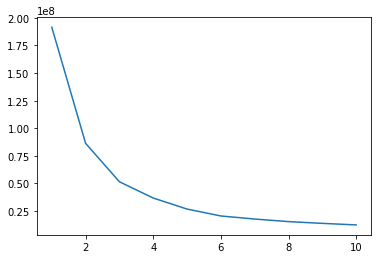

In [51]:
from sklearn.cluster import KMeans
tt=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i) 
  kmeans.fit(features,df['color'])
  tt.append(kmeans.inertia_)
plt.plot(range(1,11),tt)
plt.show()

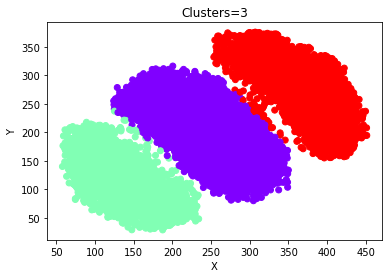

In [55]:
kmeans = KMeans(n_clusters=3)
plt.title('Clusters=3')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(df['x'], df['y'],c = kmeans.fit_predict(features, df['color']), cmap ='rainbow')
plt.show()